<a href="https://colab.research.google.com/github/jatinaswal/Machine_Learning_Projects/blob/main/fraud_detection_project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score

**Uploading** **Dataset**

In [26]:
df = pd.read_csv("/content/Fraud Detection Dataset.csv")

First 3 rows

In [27]:
df.head(3)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0


In [28]:
df.drop(columns = ["Transaction_ID","User_ID"], inplace=True)

Checking shape

In [29]:
df.shape

(51000, 10)

Checking Data types

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_Amount                48480 non-null  float64
 1   Transaction_Type                  51000 non-null  object 
 2   Time_of_Transaction               48448 non-null  float64
 3   Device_Used                       48527 non-null  object 
 4   Location                          48453 non-null  object 
 5   Previous_Fraudulent_Transactions  51000 non-null  int64  
 6   Account_Age                       51000 non-null  int64  
 7   Number_of_Transactions_Last_24H   51000 non-null  int64  
 8   Payment_Method                    48531 non-null  object 
 9   Fraudulent                        51000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 3.9+ MB


In [31]:
df.describe()

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


Checking Null Values

In [32]:
df.isnull().sum()

,0
Transaction_Amount,2520
Transaction_Type,0
Time_of_Transaction,2552
Device_Used,2473
Location,2547
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0
Payment_Method,2469
Fraudulent,0


Filling Null Values

In [33]:
num_cols = ["Transaction_Amount","Time_of_Transaction"]  #Filling Numerical Values

num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])


device_imputer = SimpleImputer(strategy = "constant", fill_value="Unknown Device") #Filling Device_Used column
df[["Device_Used"]] = device_imputer.fit_transform(df[["Device_Used"]])

cat_cols = ["Location","Payment_Method"]   #Filling Categoricl Values

cat_imputer = SimpleImputer(strategy = "constant", fill_value="Unknown")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

Checking whether the Values are Filled or Not

In [34]:
df.isnull().sum()

,0
Transaction_Amount,0
Transaction_Type,0
Time_of_Transaction,0
Device_Used,0
Location,0
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0
Payment_Method,0
Fraudulent,0


In [35]:
#Create a binary feature to capture higher fraud risk during night-time transactions.

df["Is_Night"] = df["Time_of_Transaction"].apply(
                                  lambda x: 1
                                  if x >= 22 or x <= 5
                                  else 0
                                  )

Checking columns names

In [36]:
df.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Time_of_Transaction',
       'Device_Used', 'Location', 'Previous_Fraudulent_Transactions',
       'Account_Age', 'Number_of_Transactions_Last_24H', 'Payment_Method',
       'Fraudulent', 'Is_Night'],
      dtype='object')

Fraud vs Non-Fraud Transactions

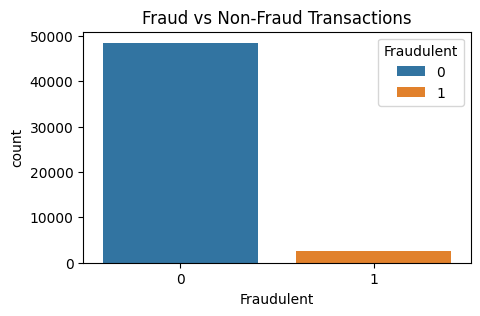


Dataset is highly Imbalanced, hence recall optimization is required.


In [37]:
plt.figure(figsize=(5,3))
sns.countplot(x='Fraudulent',hue = "Fraudulent", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()
print()
print("Dataset is highly Imbalanced, hence recall optimization is required.")

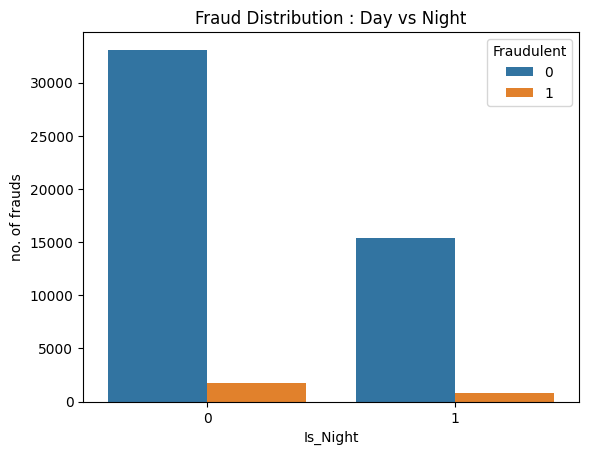


Fraud transactions are significantly higher during night hours compared to daytime.


In [38]:
sns.countplot(x = "Is_Night", hue = "Fraudulent", data = df)
plt.title("Fraud Distribution : Day vs Night")
plt.ylabel("no. of frauds")
plt.show()
print()
print("Fraud transactions are significantly higher during night hours compared to daytime.")

Encoding

In [39]:
enc_cat_cols = pd.get_dummies(df[["Transaction_Type","Device_Used","Location","Payment_Method"]], drop_first= True)
num_cols = df[["Transaction_Amount","Time_of_Transaction","Previous_Fraudulent_Transactions","Account_Age",
               "Number_of_Transactions_Last_24H","Is_Night"]]

Input/Output

In [40]:
x = pd.concat([enc_cat_cols, num_cols], axis = 1)
y = df["Fraudulent"]

Train-Test_split and Scaling

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)

std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

Logistic Regression

In [42]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

Checking Accuracy

In [43]:
y_pred = lr.predict(x_test_scaled)
accuracy_score(y_test, y_pred)*100

54.764705882352935

Confusion matrix

Confusion Matrix :  [[5353 4345]
 [ 269  233]]



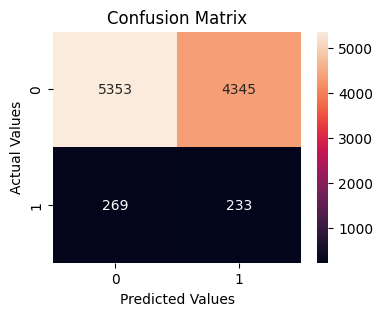

In [44]:
print("Confusion Matrix : ", confusion_matrix(y_test, y_pred))
print()

plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

Precision, Recall, f1-score

In [45]:
print("Precision Score : ",precision_score(y_test, y_pred)*100)
print("Recall Score : ",recall_score(y_test, y_pred)*100)
print("F1-score : ", f1_score(y_test, y_pred)*100)

Precision Score :  5.0895587592835305
Recall Score :  46.41434262948207
F1-score :  9.173228346456693


Threshold tuning

In [46]:
y_prob = lr.predict_proba(x_test_scaled)[:,1]
y_pred_th = (y_prob > 0.4149).astype(int)

confusion matrix, precision, recall, f1-score after threshold tuning

Precision Score :  4.941431243232602
Recall Score :  100.0
F1-score :  9.417503048494513
Confusion Matrix :  [[  41 9657]
 [   0  502]]



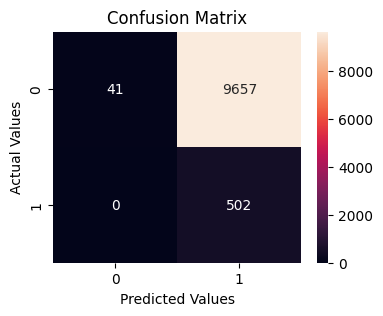

In [47]:
print("Precision Score : ",precision_score(y_test, y_pred_th)*100)
print("Recall Score : ",recall_score(y_test, y_pred_th)*100)
print("F1-score : ", f1_score(y_test, y_pred_th)*100)


print("Confusion Matrix : ", confusion_matrix(y_test, y_pred_th))
print()

plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_th), annot = True, fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall-Curve

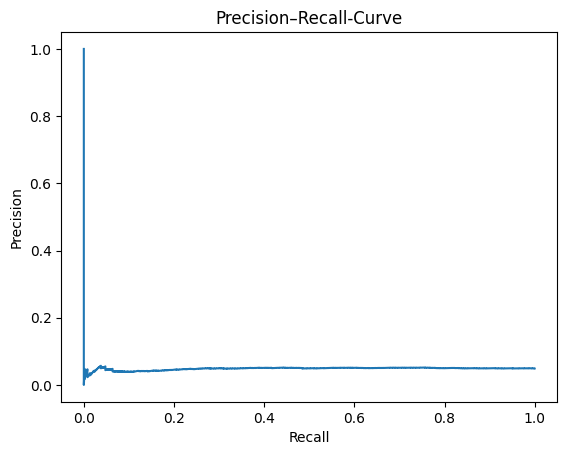


Threshold tuning helps balance recall and precision.


In [48]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall-Curve")
plt.show()
print()
print("Threshold tuning helps balance recall and precision.")

# Taking User Input for Fraud Prediction


In [52]:
Transaction_Amount = int(input("Enter Transaction_Amount : "))
Transaction_Type = input("Enter Transaction_Type (ATM/UPI/POS) : ")
Time_of_Transaction = int(input("Enter Time_of_Transaction in hour(0-23) : "))

Device_Used = input("Enter Device_Used ('Tablet', 'Mobile', 'Desktop', 'Unknown Device') : ")
Location = input("Enter Location ('San Francisco', 'New York', 'Unknown', 'Chicago', 'Boston','Houston', 'Miami', 'Los Angeles', 'Seattle') : ")

Previous_Fraudulent_Transactions = int(input("Enter Previous_Fraudulent_Transactions : "))
Account_Age = int(input("Enter Account_Age : "))
Number_of_Transactions_Last_24H = int(input("Enter Number_of_Transactions_Last_24H : "))

Payment_Method = input("Enter Payment_Method : ")
Is_Night = int(input("Enter Is_Night(0/1) : "))

#Converting into DataFrame
new_data = {
    "Transaction_Amount" : Transaction_Amount,
    "Transaction_Type"   : Transaction_Type,
    "Time_of_Transaction": Time_of_Transaction,
    "Device_Used"        : Device_Used,
    "Location"           : Location,
    "Previous_Fraudulent_Transactions" : Previous_Fraudulent_Transactions,
    "Account_Age"        : Account_Age,
    "Number_of_Transactions_Last_24H"  : Number_of_Transactions_Last_24H,
    "Payment_Method"     : Payment_Method,
    "Is_Night"           : Is_Night
}
new_df = pd.DataFrame([new_data])

#Encoding
new_df_encoded = pd.get_dummies(new_df[["Transaction_Type","Device_Used","Location","Payment_Method"]], drop_first = True)

num_cols = new_df[["Transaction_Amount","Time_of_Transaction","Previous_Fraudulent_Transactions","Account_Age",
               "Number_of_Transactions_Last_24H","Is_Night"]]
new_final = pd.concat([num_cols, new_df_encoded], axis=1)
new_final = new_final.reindex(columns=x.columns, fill_value=0)

#Scaling
new_df_scaled = std_scaler.transform(new_final)

# Predict with threshold
fraud_prob = lr.predict_proba(new_df_scaled)[:, 1]
prediction = 1 if fraud_prob >= 0.4149 else 0

print("Fraud Probability:",fraud_prob[0]*100)

if prediction == 1:
    print("Fraud Transaction!")
else:
    print("Normal Transaction")

Enter Transaction_Amount : 1000
Enter Transaction_Type (ATM/UPI/POS) : UPI
Enter Time_of_Transaction in hour(0-23) : 9
Enter Device_Used ('Tablet', 'Mobile', 'Desktop', 'Unknown Device') : Tablet
Enter Location ('San Francisco', 'New York', 'Unknown', 'Chicago', 'Boston','Houston', 'Miami', 'Los Angeles', 'Seattle') : New York
Enter Previous_Fraudulent_Transactions : 2
Enter Account_Age : 1
Enter Number_of_Transactions_Last_24H : 2
Enter Payment_Method : Credit Card
Enter Is_Night(0/1) : 1
Fraud Probability: 46.24114859985195
Fraud Transaction!


In [53]:
print("""
                    ======= PROJECT SUMMARY =======

Built an end-to-end Fraud Detection System using Logistic Regression.

Performed data preprocessing including missing value imputation and feature engineering.

Identified strong class imbalance in fraud transactions and optimized model for recall.

Created a time-based feature (Is_Night) to capture higher fraud risk during night hours.

Applied one-hot encoding for categorical variables and StandardScaler for feature scaling.

Handled imbalanced data using class_weight='balanced' in Logistic Regression.

Used stratified train-test split to maintain fraud distribution.

Performed threshold tuning (0.4149) instead of default 0.5 to improve fraud recall.

Evaluated model using Accuracy, Confusion Matrix, Precision, Recall, F1-score,
and Precision-Recall Curve.

Achieved high fraud detection recall while maintaining balanced precision.

Developed a real-time transaction prediction pipeline with fraud probability output.
""")



                    ======= PROJECT SUMMARY =======

Built an end-to-end Fraud Detection System using Logistic Regression.

Performed data preprocessing including missing value imputation and feature engineering.

Identified strong class imbalance in fraud transactions and optimized model for recall.

Created a time-based feature (Is_Night) to capture higher fraud risk during night hours.

Applied one-hot encoding for categorical variables and StandardScaler for feature scaling.

Handled imbalanced data using class_weight='balanced' in Logistic Regression.

Used stratified train-test split to maintain fraud distribution.

Performed threshold tuning (0.4149) instead of default 0.5 to improve fraud recall.

Evaluated model using Accuracy, Confusion Matrix, Precision, Recall, F1-score,
and Precision-Recall Curve.

Achieved high fraud detection recall while maintaining balanced precision.

Developed a real-time transaction prediction pipeline with fraud probability output.

